<a href="https://colab.research.google.com/github/richapatel93/Data-Mining-Class/blob/main/Finalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Setting Up Environment and Loading Data


In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
from google.colab import files

# Step 2: Upload the CSV files
print("Please upload the 'application_record.csv' file:")
uploaded_app = files.upload()  # Upload 'application_record.csv'

print("Please upload the 'credit_record.csv' file:")
uploaded_credit = files.upload()  # Upload 'credit_record.csv'

# Step 3: Load the uploaded CSV files
app_file_name = list(uploaded_app.keys())[0]  # Get the uploaded application file name
credit_file_name = list(uploaded_credit.keys())[0]  # Get the uploaded credit file name

# Read the files into pandas DataFrames
app_data = pd.read_csv(app_file_name)
credit_data = pd.read_csv(credit_file_name)

# Step 4: Preview the data
print("\nApplication Data (first 5 rows):")
print(app_data.head())

print("\nCredit Data (first 5 rows):")
print(credit_data.head())


Please upload the 'application_record.csv' file:


Saving application_record.csv to application_record.csv
Please upload the 'credit_record.csv' file:


Saving credit_record.csv to credit_record.csv

Application Data (first 5 rows):
        ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS

# Step 2:Data Preprocessing and Cleaning

In [ ]:
# Step 2: Data Preprocessing and Cleaning

# Step 2.1: Handling Missing Values
# Check for missing values in both datasets
print("\nMissing values in application data:")
print(app_data.isnull().sum())

print("\nMissing values in credit data:")
print(credit_data.isnull().sum())

# Handling missing values - for simplicity, let's drop rows with missing values
app_data_cleaned = app_data.dropna()
credit_data_cleaned = credit_data.dropna()

# Step 2.2: Changing Data Types (if necessary)
# Example: Converting 'ID' column to string (if necessary)
app_data_cleaned['ID'] = app_data_cleaned['ID'].astype(str)
credit_data_cleaned['ID'] = credit_data_cleaned['ID'].astype(str)

# Example of handling warnings by using .loc to ensure modifications are made directly on the DataFrame

# Converting 'ID' column to string
app_data_cleaned.loc[:, 'ID'] = app_data_cleaned['ID'].astype(str)

# Creating the 'has_credit_history' column
app_data_cleaned.loc[:, 'has_credit_history'] = app_data_cleaned['ID'].isin(credit_data_cleaned['ID'])

# Encoding 'CODE_GENDER' column
app_data_cleaned.loc[:, 'CODE_GENDER'] = app_data_cleaned['CODE_GENDER'].map({'M': 1, 'F': 0})


# Step 2.3: Feature Engineering
# Example: Add a feature to check if the applicant has a credit history or not.
app_data_cleaned['has_credit_history'] = app_data_cleaned['ID'].isin(credit_data_cleaned['ID'])

# Step 2.4: Handling Categorical Variables
# Convert categorical variables (e.g., CODE_GENDER) into numerical values using encoding
app_data_cleaned['CODE_GENDER'] = app_data_cleaned['CODE_GENDER'].map({'M': 1, 'F': 0})

# Step 2.5: Merging Datasets
# Merge application data and credit history data on the 'ID' column
merged_data = pd.merge(app_data_cleaned, credit_data_cleaned, on='ID', how='inner')

# Preview the cleaned and merged data
print("\nMerged Data (first 5 rows):")
print(merged_data.head())




Missing values in application data:
ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

Missing values in credit data:
ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64


<ipython-input-9-f95c95a7e864>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app_data_cleaned['ID'] = app_data_cleaned['ID'].astype(str)
<ipython-input-9-f95c95a7e864>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app_data_cleaned.loc[:, 'has_credit_history'] = app_data_cleaned['ID'].isin(credit_data_cleaned['ID'])
<ipython-input-9-f95c95a7e864>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See


Merged Data (first 5 rows):
        ID  CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008806          NaN            Y               Y             0   
1  5008806          NaN            Y               Y             0   
2  5008806          NaN            Y               Y             0   
3  5008806          NaN            Y               Y             0   
4  5008806          NaN            Y               Y             0   

   AMT_INCOME_TOTAL NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          112500.0          Working  Secondary / secondary special   
1          112500.0          Working  Secondary / secondary special   
2          112500.0          Working  Secondary / secondary special   
3          112500.0          Working  Secondary / secondary special   
4          112500.0          Working  Secondary / secondary special   

  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  ...  DAYS_EMPLOYED  FLAG_MOBIL  \
0            Married  House / apartment  ...    

# Feature Engineering and Data Preprocessing

In [ ]:
# Ensure that we're not working on a slice of the original DataFrame
app_data_cleaned = app_data_cleaned.copy()

# Encode categorical variables using LabelEncoder
app_data_cleaned['CODE_GENDER'] = app_data_cleaned['CODE_GENDER'].map({'M': 1, 'F': 0})  # Already done
app_data_cleaned['NAME_INCOME_TYPE'] = LabelEncoder().fit_transform(app_data_cleaned['NAME_INCOME_TYPE'])
app_data_cleaned['NAME_EDUCATION_TYPE'] = LabelEncoder().fit_transform(app_data_cleaned['NAME_EDUCATION_TYPE'])
app_data_cleaned['NAME_FAMILY_STATUS'] = LabelEncoder().fit_transform(app_data_cleaned['NAME_FAMILY_STATUS'])
app_data_cleaned['NAME_HOUSING_TYPE'] = LabelEncoder().fit_transform(app_data_cleaned['NAME_HOUSING_TYPE'])

# Create new features like 'Age' and 'Experience'
app_data_cleaned['Age'] = (app_data_cleaned['DAYS_BIRTH'] / -365).astype(int)  # Convert DAYS_BIRTH to Age
app_data_cleaned['Experience'] = (app_data_cleaned['DAYS_EMPLOYED'] / -365).astype(int)  # Convert DAYS_EMPLOYED to Experience

# Handle missing values in 'OCCUPATION_TYPE'
app_data_cleaned['OCCUPATION_TYPE'] = app_data_cleaned['OCCUPATION_TYPE'].fillna('Unknown')  # Fill missing occupation type

# Feature scaling (if necessary)
scaler = StandardScaler()
scaled_features = ['AMT_INCOME_TOTAL', 'Age', 'Experience']
app_data_cleaned[scaled_features] = scaler.fit_transform(app_data_cleaned[scaled_features])

# Final check
print(app_data_cleaned.head())


        ID  CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
2  5008806          NaN            Y               Y             0   
3  5008808          NaN            N               Y             0   
4  5008809          NaN            N               Y             0   
5  5008810          NaN            N               Y             0   
6  5008811          NaN            N               Y             0   

   AMT_INCOME_TOTAL  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
2         -0.704169                 4                    4   
3          0.642308                 0                    4   
4          0.642308                 0                    4   
5          0.642308                 0                    4   
6          0.642308                 0                    4   

   NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  ...  DAYS_EMPLOYED  FLAG_MOBIL  \
2                   1                  1  ...          -1134           1   
3                   3                  1  ...         

In [ ]:
# Check the column names in the dataset
print(app_data_cleaned.columns)


Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'has_credit_history', 'Age', 'Experience'],
      dtype='object')


In [ ]:
# Create a target variable
app_data_cleaned['TARGET'] = app_data_cleaned['has_credit_history'].apply(lambda x: 1 if x else 0)

# Now split the data
X = app_data_cleaned.drop(columns=['ID', 'TARGET'])
y = app_data_cleaned['TARGET']


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Encoding categorical columns to numeric using LabelEncoder
label_columns = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
                 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
                 'OCCUPATION_TYPE', 'has_credit_history']

label_encoder = LabelEncoder()

for col in label_columns:
    app_data_cleaned[col] = label_encoder.fit_transform(app_data_cleaned[col])

# Step 1: Split the data into features (X) and target (y)
X = app_data_cleaned.drop(columns=['ID', 'TARGET'])
y = app_data_cleaned['TARGET']



# Step 2: Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Choose a model (e.g., Logistic Regression)
model = LogisticRegression(max_iter=1000)

# Step 4: Train the model on the training data
model.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55778
           1       1.00      1.00      1.00      5093

    accuracy                           1.00     60871
   macro avg       1.00      1.00      1.00     60871
weighted avg       1.00      1.00      1.00     60871



In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print(f'Cross-validation scores: {cross_val_scores}')
print(f'Mean cross-validation score: {cross_val_scores.mean()}')


Cross-validation scores: [1. 1. 1. 1. 1.]
Mean cross-validation score: 1.0


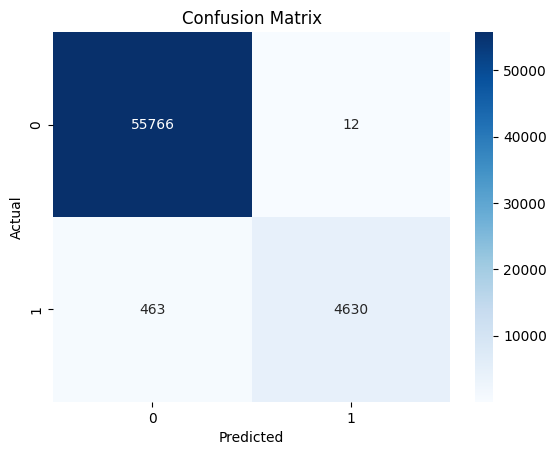

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Re-train the model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Make predictions and evaluate accuracy
y_pred = model.predict(X_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")


Test Accuracy: 1.0


# Evaluate Additional Metrics

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55778
           1       1.00      1.00      1.00      5093

    accuracy                           1.00     60871
   macro avg       1.00      1.00      1.00     60871
weighted avg       1.00      1.00      1.00     60871

Confusion Matrix:
[[55778     0]
 [    0  5093]]


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X_scaled, y, cv=5)

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")


Cross-validation scores: [1. 1. 1. 1. 1.]
Mean cross-validation score: 1.0


In [ ]:
# Get model coefficients (importance of each feature)
coefficients = model.coef_[0]
feature_importance = list(zip(X.columns, coefficients))

# Sort by absolute coefficient value
feature_importance = sorted(feature_importance, key=lambda x: abs(x[1]), reverse=True)

print("Feature Importance:")
for feature, coef in feature_importance:
    print(f"{feature}: {coef}")


Feature Importance:
has_credit_history: 5.048403714873692
CNT_FAM_MEMBERS: -0.04273071987209357
CNT_CHILDREN: -0.04034725421330961
NAME_FAMILY_STATUS: 0.026859476233167902
DAYS_EMPLOYED: 0.017420108174268187
Experience: -0.015530866850601288
FLAG_OWN_REALTY: -0.006764658203932436
FLAG_OWN_CAR: -0.006611244965915872
Age: 0.0062741652345596295
DAYS_BIRTH: -0.005942968670631107
NAME_INCOME_TYPE: -0.004835233616546666
NAME_HOUSING_TYPE: 0.00322708272727314
OCCUPATION_TYPE: 0.0030807223895158624
FLAG_WORK_PHONE: 0.0028287281219149633
FLAG_EMAIL: -0.002591719430115382
NAME_EDUCATION_TYPE: -0.0021918994301304362
AMT_INCOME_TOTAL: 0.001732430773509342
FLAG_PHONE: -0.00048060155084371416
CODE_GENDER: 0.0
FLAG_MOBIL: 0.0


# Feature Selection

In [ ]:
# Drop low-importance features
X_reduced = X.drop(columns=['CODE_GENDER', 'FLAG_MOBIL', 'FLAG_PHONE'])

# Re-split, train, and evaluate the model
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
print(f"Test Accuracy after feature reduction: {accuracy_score(y_test, y_pred)}")


Test Accuracy after feature reduction: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Re-train the model with more iterations
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test)
print(f"Test Accuracy after increasing max_iter: {accuracy_score(y_test, y_pred)}")


Test Accuracy after increasing max_iter: 1.0


Cross-Validation after new feature selection

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Logistic Regression after feature reduction
cv_scores = cross_val_score(LogisticRegression(max_iter=500), X_reduced, y, cv=5, scoring='accuracy')
print(f"Cross-validation scores after feature reduction: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")


Cross-validation scores after feature reduction: [1. 1. 1. 1. 1.]
Mean cross-validation score: 1.0


In [ ]:
import joblib
# Save the model
joblib.dump(model, 'credit_approval_model.pkl')


['credit_approval_model.pkl']

Model Interpretation & Explainability

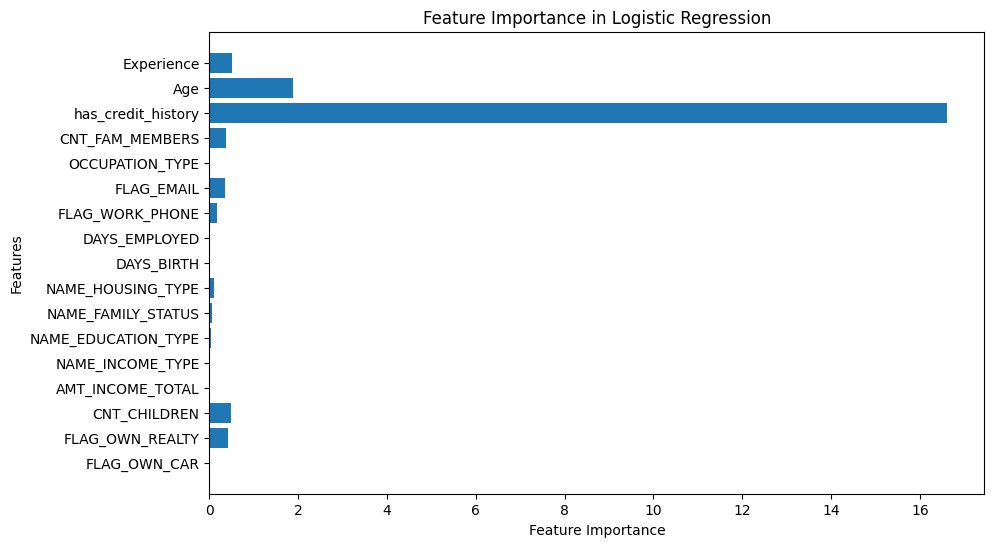

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get model coefficients
coefficients = model.coef_[0]
features = X_reduced.columns

# Plot feature importance
feature_importance = np.abs(coefficients)
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Logistic Regression')
plt.show()
